In [128]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV

In [10]:
chess_data = pd.read_csv('games.csv')
chess_data.drop(['id', 'rated', 'created_at', 'last_move_at', 'white_id', 'black_id', 'increment_code', 'moves', 'opening_eco', 'opening_name'], axis=1, inplace=True)
chess_data.dropna(axis=0)
chess_data['victory_status'].replace(['outoftime', 'resign', 'mate', 'draw'], [0, 1, 2, 3], inplace=True)
chess_data['winner'].replace(['black', 'white', 'draw'], [0, 1, 2], inplace=True)
chess_data.head()

,turns,victory_status,winner,white_rating,black_rating,opening_ply
0,13,0,1,1500,1191,5
1,16,1,0,1322,1261,4
2,61,2,1,1496,1500,3
3,61,2,1,1439,1454,3
4,95,2,1,1523,1469,5


In [125]:
y = chess_data['winner']
X = chess_data.drop(['winner', 'victory_status', 'turns', 'opening_ply'], axis=1)

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [50]:
model = KNeighborsClassifier(n_neighbors=30)
cross_val_score(model, X_train, y_train, cv=5).mean()

0.6076895685712593

In [54]:
model = KNeighborsClassifier()
k = np.arange(1, 30)

train_score, val_score = validation_curve(model, X_train, y_train, 'n_neighbors', k, cv=5)

plt.plot(k, val_score.mean(axis=1))

d:\ec40144\documents\python\bet_guessr\venv\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass param_name=n_neighbors, param_range=[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


KeyboardInterrupt: 

In [129]:
param_grid = {'loss': ['hinge', 'modified_huber', 'log'],
              'penalty': ['l1', 'l2'],
              'max_iter': np.arange(1,10)}
grid = GridSearchCV(SGDClassifier(), param_grid, cv=5)

grid.fit(X_train, y_train)

d:\ec40144\documents\python\bet_guessr\venv\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
d:\ec40144\documents\python\bet_guessr\venv\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
d:\ec40144\documents\python\bet_guessr\venv\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
d:\ec40144\documents\python\bet_guessr\venv\lib\site-packages\sklearn\linear_model\_stochastic_gradient

GridSearchCV(cv=5, estimator=SGDClassifier(),
             param_grid={'loss': ['hinge', 'modified_huber', 'log'],
                         'max_iter': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'penalty': ['l1', 'l2']})

In [131]:
grid.best_score_


0.5929822374571517

In [132]:
grid.best_params_

{'loss': 'log', 'max_iter': 1, 'penalty': 'l2'}

In [133]:
model = grid.best_estimator_

In [134]:
model.score(X_test, y_test)

0.47507477567298106

In [135]:
predict = np.array([800, 800]).reshape(1, 2)
print(model.predict(predict))
print(model.predict_proba(predict))

[0]
[[nan nan nan]]


d:\ec40144\documents\python\bet_guessr\venv\lib\site-packages\sklearn\linear_model\_base.py:329: RuntimeWarning: invalid value encountered in true_divide
  prob /= prob.sum(axis=1).reshape((prob.shape[0], -1))


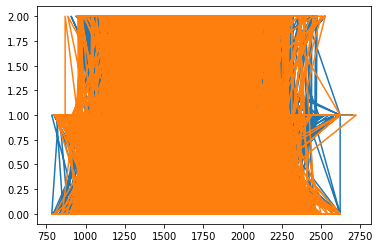

In [91]:
plt.plot(X[['white_rating', 'black_rating']],y)